In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
df_math = pd.read_csv('student-mat.csv',sep=';')
df_por = pd.read_csv('student-por.csv',sep=';')
df_math_and_por = pd.concat([df_math,df_por])

In [5]:
df_math_and_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# Złe relacje rodzinne odbijają się negatywnie na wynikach ucznia.

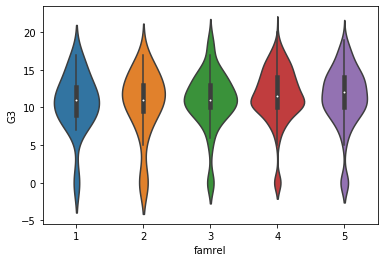

In [6]:
sns.violinplot(data=df_math_and_por,x='famrel',y='G3')

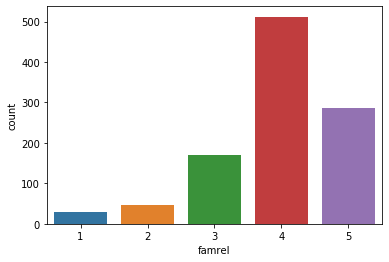

In [7]:
sns.countplot(df_math_and_por['famrel'])

Z violin plotów wynikałoby, że hipoteza jest nieprawdziwa i wyniki końcowe uczniów są rozłożone tak samo niezależnie od ich relacji rodzinnych. Trzeba jednak brać pod uwagę zdecydowaną róźnicę w liczności grup.

# Mężczyźni i kobiety poświęcają tyle samo czasu na naukę w każdym wieku.

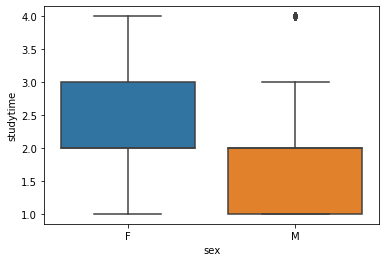

In [91]:
sns.boxplot(data=df_math_and_por,x='sex',y='studytime')

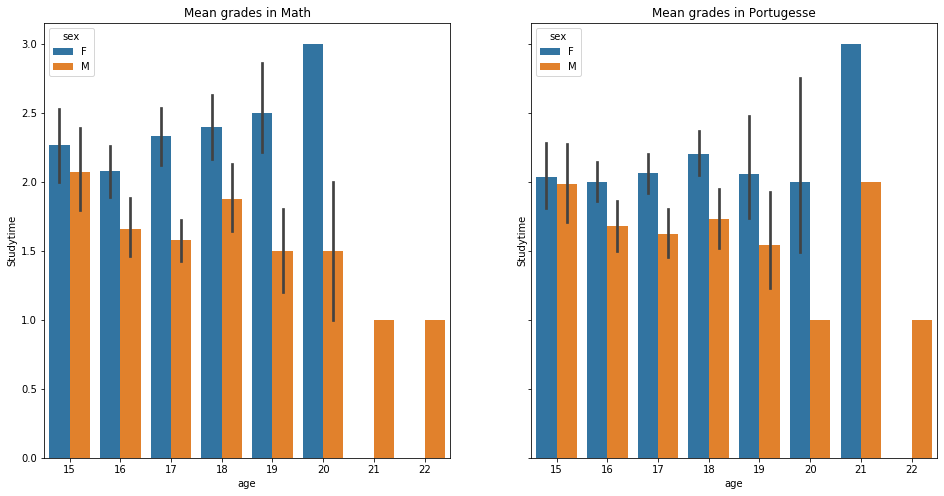

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.barplot(data=df_math,x='age',y='studytime',hue='sex',ax=ax1)
sns.barplot(data=df_por,x='age',y='studytime',hue='sex',ax=ax2)
ax1.set_ylabel("Studytime")
ax2.set_ylabel("Studytime")
ax1.title.set_text("Mean grades in Math")
ax2.title.set_text("Mean grades in Portugesse")

Z boxplota wyraźnie widać, że w ogólności męska część uczniów deklaruje, że poświęca mniej czasu na naukę niż kobiety. Ponadto z  barplotów wynikałoby, że wraz z wiekiem mężczyźni poświęcają coraz mniej czasu naukę, gdzie u kobiet nie zauważamy znaczących spadków, co falsyfikuje hipotezę.

# Uczniowie pijący mniej alkoholu cieszą się lepszym zdrowiem.

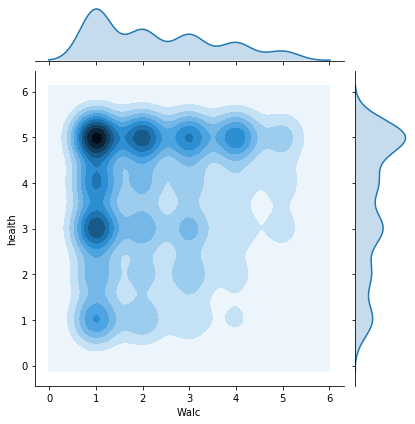

In [144]:
#Weekend
sns.jointplot(kind="kde",data=df_math_and_por,x='Walc',y='health')

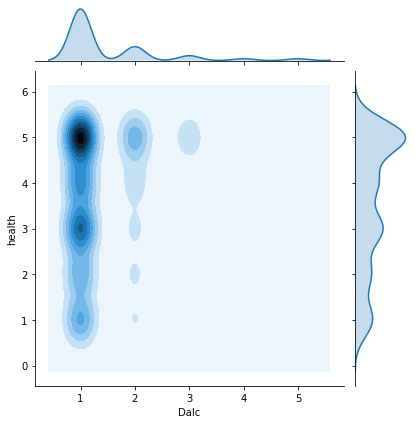

In [145]:
#Dni pracujące
sns.jointplot(kind="kde",data=df_math_and_por,x='Dalc',y='health')

Z obu jointplotów wynikałoby, że istnieje korelacja między spożyciem alkoholu, a zdrowiem ucznia więc hipoteza jest prawdziwa. 

# Uczniowie pijący mniej alkoholu w weekendy mają znacznie lepsze wyniki.

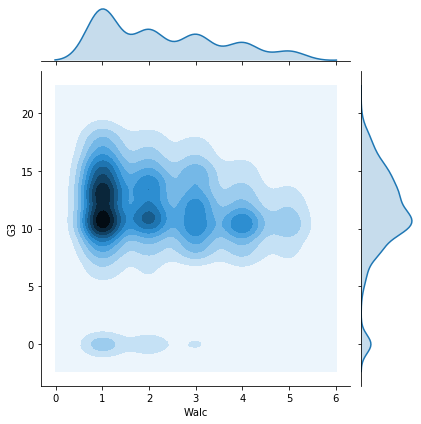

In [146]:
sns.jointplot(kind="kde",data=df_math_and_por,x='Walc',y='G3')

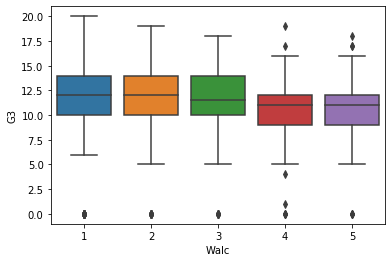

In [10]:
sns.boxplot(data=df_math_and_por,x='Walc',y='G3')

Oba wykresy przedstawiają względnie to samo, ale na boxplocie, na którym są zaznaczone 'wąsy' widać, że przesuwają się one w dół, co oznacze gorsze wyniki, w zależności od tego ile alkoholu uczniowie pili w weekend. W takim wypadku hipoteza o 'znacznie gorszych wynikach' jest wyolbrzymieniem, ale nie należy jej odrzucać.

# Uczniowie chcący podjąć wyższą edukację będą mieli lepsze wyniki, niż Ci którzy nie chcą.


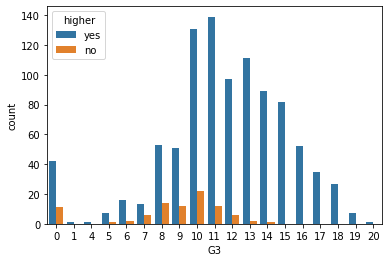

In [159]:
sns.countplot(data=df_math_and_por,x='G3',hue='higher')
plt.suptitle("Avarage final grade")

[Text(0.5, 0, 'final grade')]

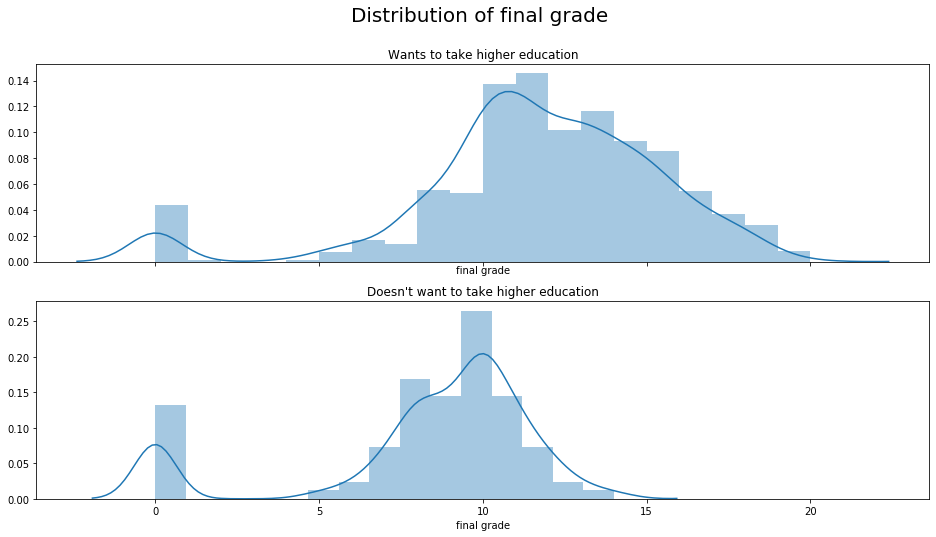

In [31]:
df_higher_yes=df_math_and_por[df_math_and_por['higher']=='yes']
df_higher_no=df_math_and_por[df_math_and_por['higher']=='no']
fig, (ax1,ax2)=plt.subplots(2,1, sharex=True, figsize=(16, 8))
sns.distplot(df_higher_yes['G3'],bins=20,ax=ax1)
sns.distplot(df_higher_no['G3'],bins=15,ax=ax2)
plt.suptitle("Distribution of final grade",x=0.51,size=20)
ax1.set_title("Wants to take higher education")
ax2.set_title("Doesn't want to take higher education")
ax1.set(xlabel='final grade')
ax2.set(xlabel='final grade')

Z samego barplota możnaby wnioskować, że hipoteza jest prawdziwa, jendak dopiero po porównaniu wykresów rozkładów wyraźnie widać, że ogon wykresu uczniów chcących podjąć wyższą edukację jest zdecydowanie dłuższy z prawej strony, co potwierdza hipotezę.